In [123]:
import pandas as pd
import numpy as np
from scipy import stats
import re
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df=pd.read_csv('../data/clean/startup_data_clean2.csv')
df.head()

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
0,CA,San Diego,Bandsintown,1/1/2007,active,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1
1,CA,Los Gatos,TriCipher,1/1/2000,active,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1
2,CA,San Diego,Plixi,3/18/2009,active,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1
3,CA,Cupertino,Solidcore Systems,1/1/2002,active,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1
4,CA,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0


In [257]:
def conditions(df):
    if (df['closed_at'] == 'active') & (df['is_top500'] == 1) or (df['is_acquired'] == 1):
        return 1
    else:
        return 0

In [258]:
df['success'] = df.apply(conditions, axis=1)

In [259]:
df

,state_code,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired,success
0,CA,San Diego,Bandsintown,1/1/2007,active,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.0000,0,1,1
1,CA,Los Gatos,TriCipher,1/1/2000,active,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,4.7500,1,1,1
2,CA,San Diego,Plixi,3/18/2009,active,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.0000,1,1,1
3,CA,Cupertino,Solidcore Systems,1/1/2002,active,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3.3333,1,1,1
4,CA,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1.0000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,San Francisco,CoTweet,1/1/2009,active,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,6.0000,1,1,1
919,MA,Burlington,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2.6667,1,0,0
920,CA,Sunnyvale,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8.0000,1,0,0
921,CA,San Francisco,Causata,1/1/2009,active,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1.0000,1,1,1


In [10]:
df['is_acquired'].value_counts()

1    597
0    326
Name: is_acquired, dtype: int64

In [260]:
df['success'].value_counts()

1    597
0    326
Name: success, dtype: int64

In [11]:
df_num = df.select_dtypes(include=[np.number])
df_cat = df.select_dtypes(exclude=[np.number])

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


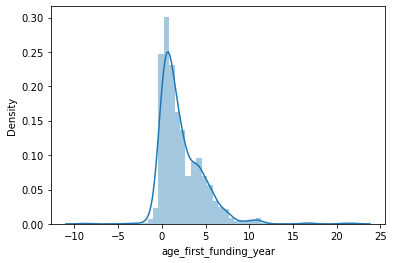

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


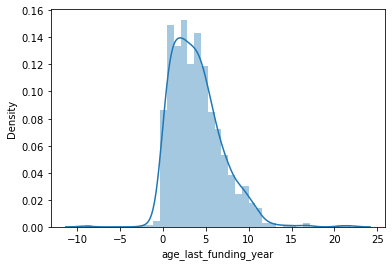

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


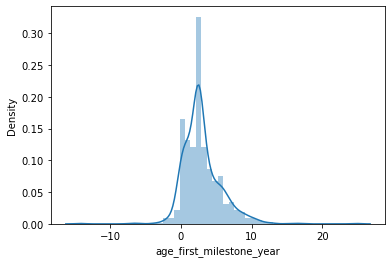

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


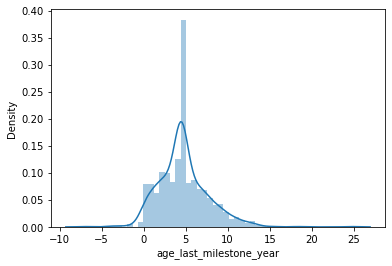

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


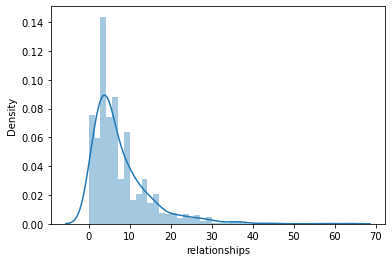

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


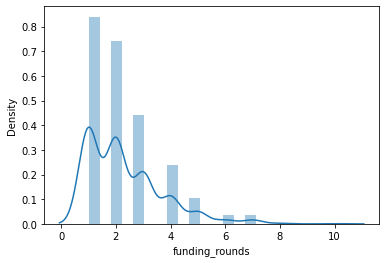

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


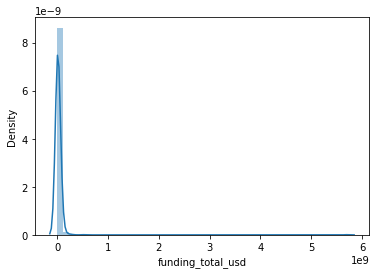

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


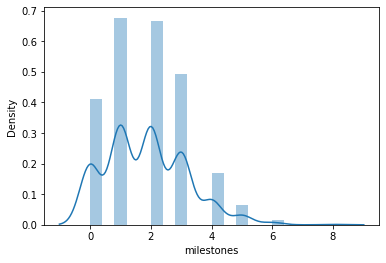

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


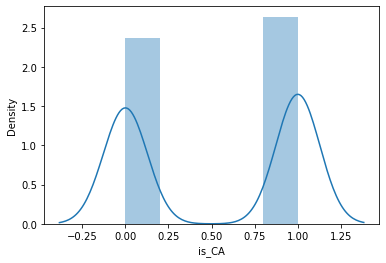

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


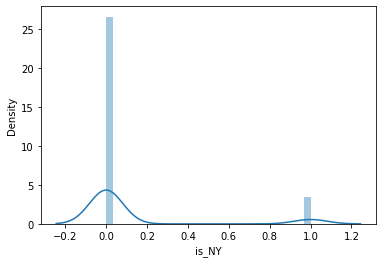

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


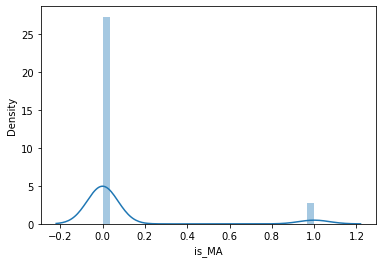

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


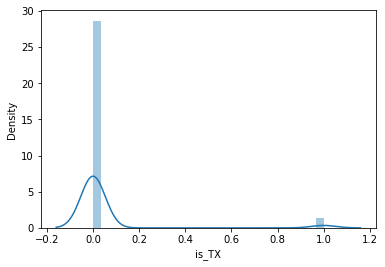

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


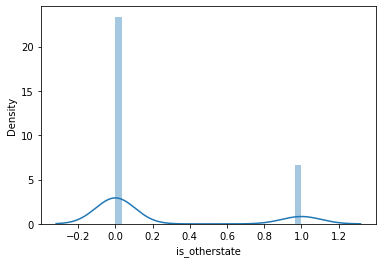

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


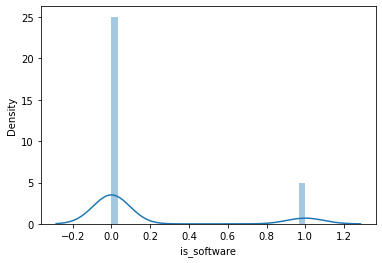

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


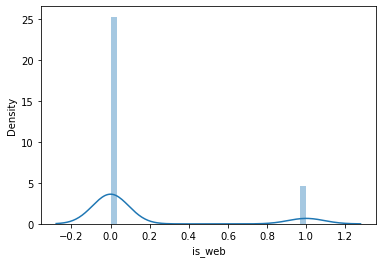

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


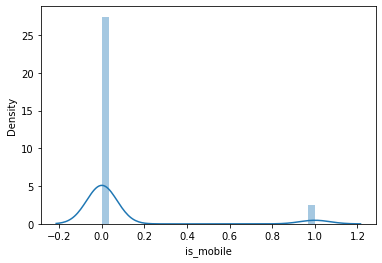

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


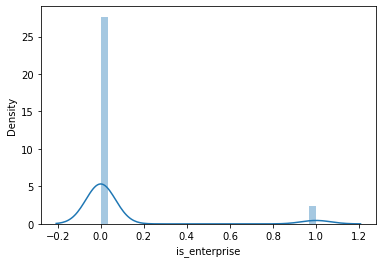

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


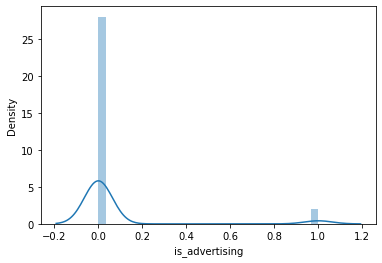

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


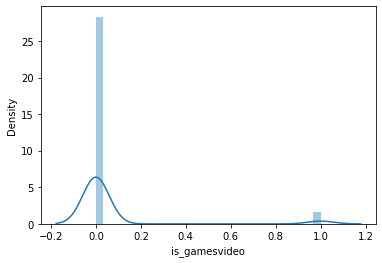

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


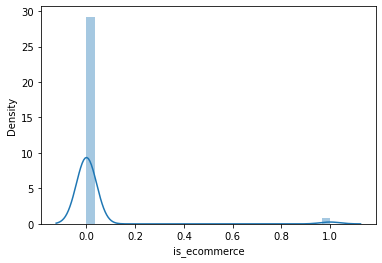

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


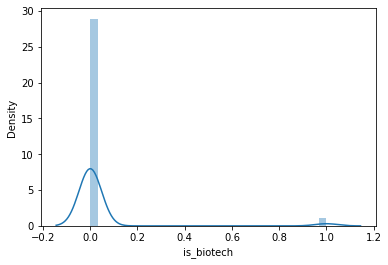

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


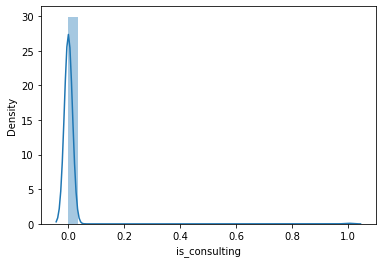

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


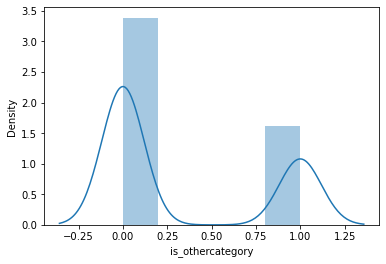

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


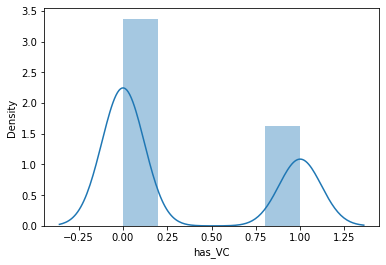

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


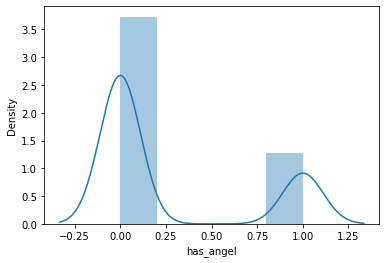

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


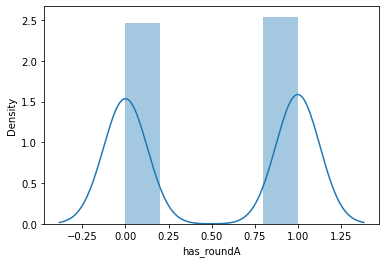

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


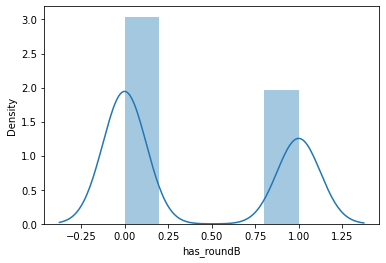

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


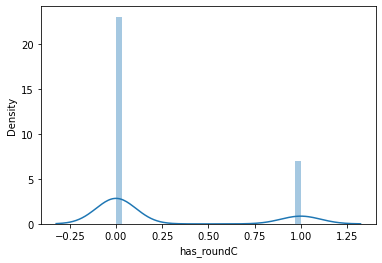

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


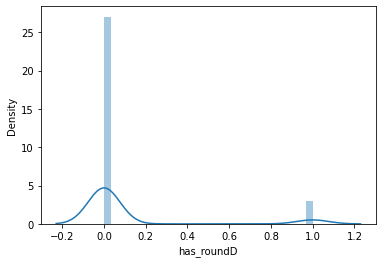

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


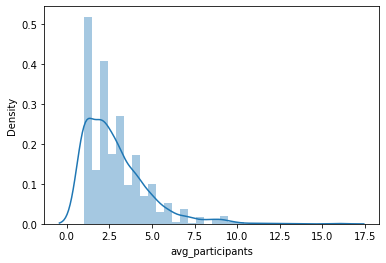

c:\Users\pbevi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


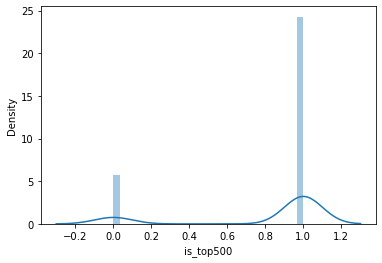

In [20]:
sns.distplot(df_num['age_first_funding_year'])
plt.show()

sns.distplot(df_num['age_last_funding_year'])
plt.show()

sns.distplot(df_num['age_first_milestone_year'])
plt.show()

sns.distplot(df_num['age_last_milestone_year'])
plt.show()

sns.distplot(df_num['relationships'])
plt.show()

sns.distplot(df_num['funding_rounds'])
plt.show()

sns.distplot(df_num['funding_total_usd'])
plt.show()

sns.distplot(df_num['milestones'])
plt.show()

sns.distplot(df_num['is_CA'])
plt.show()

sns.distplot(df_num['is_NY'])
plt.show()

sns.distplot(df_num['is_MA'])
plt.show()

sns.distplot(df_num['is_TX'])
plt.show()

sns.distplot(df_num['is_otherstate'])
plt.show()

sns.distplot(df_num['is_software'])
plt.show()

sns.distplot(df_num['is_web'])
plt.show()

sns.distplot(df_num['is_mobile'])
plt.show()

sns.distplot(df_num['is_enterprise'])
plt.show()

sns.distplot(df_num['is_advertising'])
plt.show()

sns.distplot(df_num['is_gamesvideo'])
plt.show()

sns.distplot(df_num['is_ecommerce'])
plt.show()

sns.distplot(df_num['is_biotech'])
plt.show()

sns.distplot(df_num['is_consulting'])
plt.show()

sns.distplot(df_num['is_othercategory'])
plt.show()

sns.distplot(df_num['has_VC'])
plt.show()

sns.distplot(df_num['has_angel'])
plt.show()

sns.distplot(df_num['has_roundA'])
plt.show()

sns.distplot(df_num['has_roundB'])
plt.show()

sns.distplot(df_num['has_roundC'])
plt.show()

sns.distplot(df_num['has_roundD'])
plt.show()

sns.distplot(df_num['avg_participants'])
plt.show()

sns.distplot(df_num['is_top500'])
plt.show()

### Split X/Y

In [17]:
y=df_num['is_acquired']
X=df_num.drop(['is_acquired'], axis=1)

### Train and Test

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [101]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (738, 31)
Shape of the y Train : (738,)
Shape of the X test : (185, 31)
Shape of the y test : (185,)


In [19]:
X_train

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
287,1.9342,4.0438,2.0027,10.1890,2,2,24300000,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2.5,1
174,3.1479,4.8795,5.0027,5.0027,5,2,14000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0,1
516,2.7753,5.0027,4.1644,10.7534,2,3,17400000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,5.0,1
189,0.7397,1.1425,0.5808,0.5808,15,2,15700000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3.0,1
787,0.0000,0.0000,0.0000,0.0000,2,1,250000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,1.9260,1.9260,1.6685,2.4658,1,1,12000000,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,1
871,6.2986,6.2986,6.0027,6.0027,9,1,15000000,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3.0,1
835,4.0795,4.0795,2.5205,4.4767,0,1,4000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6.0,1
792,0.0822,0.8384,0.0000,4.1836,4,2,4500000,5,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,5.5,1


Splitting, correct imbalancing and then standard scalling the numericals

In [29]:
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [102]:
print("Shape of the X Train_res :", X_train_res.shape)
print("Shape of the y Train :", y_train_res.shape)

Shape of the X Train_res : (950, 31)
Shape of the y Train : (950,)


In [32]:
X_train_res

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1.9342,4.0438,2.0027,10.1890,2,2,24300000,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2.5,1
1,3.1479,4.8795,5.0027,5.0027,5,2,14000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2.0,1
2,2.7753,5.0027,4.1644,10.7534,2,3,17400000,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,5.0,1
3,0.7397,1.1425,0.5808,0.5808,15,2,15700000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,3.0,1
4,0.0000,0.0000,0.0000,0.0000,2,1,250000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,6.6027,6.6027,4.0027,4.0027,3,1,10360000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5.0,1
946,1.4521,1.4521,2.5205,4.4767,0,1,4000000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.0,0
947,4.8438,4.8438,2.5205,4.4767,2,1,10000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0
948,1.5151,1.7644,0.7479,0.7479,6,2,2238055,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1.0,1


In [38]:
X_train_res.describe()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,9.500000e+02,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,2.230363,3.844395,2.744066,4.405555,6.707368,2.267368,2.491071e+07,1.714737,0.535789,0.104211,0.089474,0.046316,0.222105,0.161053,0.147368,0.093684,0.066316,0.064211,0.064211,0.025263,0.034737,0.002105,0.341053,0.344211,0.260000,0.475789,0.365263,0.221053,0.087368,2.702993,0.785263
std,2.581239,3.008072,2.619729,2.876261,6.594107,1.419453,1.875765e+08,1.310448,0.498980,0.305694,0.285577,0.210279,0.415880,0.367773,0.354660,0.291542,0.248964,0.245257,0.245257,0.157006,0.183209,0.045859,0.474313,0.475360,0.438865,0.499677,0.481758,0.415174,0.282523,1.837744,0.410856
min,-9.046600,-9.046600,-14.169900,-3.882200,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.568475,1.580800,1.002700,2.499975,3.000000,1.000000,2.300000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.413700,3.383550,2.520500,4.476700,5.000000,2.000000,9.575000e+06,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,3.458900,5.561600,3.835600,5.624650,9.000000,3.000000,2.338750e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.500000,1.000000
max,21.895900,21.895900,24.684900,24.684900,57.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [31]:
y_train_res.value_counts()

1    475
0    475
Name: is_acquired, dtype: int64

##### Imbalanced is fixed, but I still need to work on standarization of the other columns

In [103]:
X_train_num = X_train_res.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [104]:
X_train_norm

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0.354878,0.423056,0.416232,0.492567,0.035088,0.111111,0.004261,0.375,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.100000,1.0
1,0.394102,0.450064,0.493442,0.311019,0.087719,0.111111,0.002454,0.125,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.066667,1.0
2,0.382060,0.454045,0.471867,0.512324,0.035088,0.222222,0.003051,0.250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.266667,1.0
3,0.316274,0.329291,0.379636,0.156229,0.263158,0.111111,0.002752,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.133333,1.0
4,0.292368,0.292368,0.364689,0.135898,0.035088,0.000000,0.000042,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.505754,0.505754,0.467705,0.276013,0.052632,0.000000,0.001816,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.266667,1.0
946,0.339297,0.339297,0.429558,0.292606,0.000000,0.000000,0.000700,0.000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.133333,0.0
947,0.448910,0.448910,0.429558,0.292606,0.035088,0.000000,0.001752,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.066667,0.0
948,0.341333,0.349390,0.383937,0.162078,0.105263,0.111111,0.000391,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0


In [106]:
X_train_norm.shape

(950, 31)

In [105]:
# remember: y = df['is_acquired'], y_train selected in train_test_split
X_train_transformed = X_train_norm

In [43]:
X_train_transformed

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,0.354878,0.423056,0.416232,0.492567,0.035088,0.111111,0.004261,0.375,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.100000,1.0
1,0.394102,0.450064,0.493442,0.311019,0.087719,0.111111,0.002454,0.125,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.066667,1.0
2,0.382060,0.454045,0.471867,0.512324,0.035088,0.222222,0.003051,0.250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.266667,1.0
3,0.316274,0.329291,0.379636,0.156229,0.263158,0.111111,0.002752,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.133333,1.0
4,0.292368,0.292368,0.364689,0.135898,0.035088,0.000000,0.000042,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.505754,0.505754,0.467705,0.276013,0.052632,0.000000,0.001816,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.266667,1.0
946,0.339297,0.339297,0.429558,0.292606,0.000000,0.000000,0.000700,0.000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.133333,0.0
947,0.448910,0.448910,0.429558,0.292606,0.035088,0.000000,0.001752,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.066667,0.0
948,0.341333,0.349390,0.383937,0.162078,0.105263,0.111111,0.000391,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0


### Logistic Regression classification

In [44]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial')

classification.fit(X_train_transformed, y_train_res)

LogisticRegression(multi_class='multinomial', random_state=0)

In [113]:
y_test_pred = classification.predict(X_test)

from sklearn.metrics import accuracy_score


In [115]:
#accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6594594594594595


In [226]:
Logistic_Regression_classification_accuracy= classification.score(X_test, y_test) # Accuracy for classification models and R2 for regression mnodels
Logistic_Regression_classification_accuracy

0.6594594594594595

In [60]:
confusion_matrix(y_test, y_test_pred)

array([[  0,  63],
       [  0, 122]], dtype=int64)

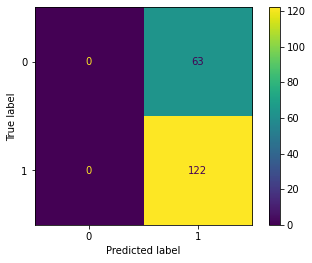

In [61]:
cm_test = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(cm_test,display_labels=classification.classes_)
disp.plot()
plt.show()

By the confusion matrix, True positive is more than double of False positive, fp is still significant which can affect the decision making of a start-up to invest.

In [62]:
cohen_kappa_score(y_test, y_test_pred)

0.0

The cohen kappa as 0 shows that there is random agreement among raters

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        63
           1       0.66      1.00      0.79       122

    accuracy                           0.66       185
   macro avg       0.33      0.50      0.40       185
weighted avg       0.43      0.66      0.52       185



c:\Users\pbevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pbevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pbevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Even correcting the imbalancing before predicting is possible to see that the model is very good to predict if the start-up will be acquired but not so good that the start-up will not be acquired.

### Decision Tree

First parameters:

In [161]:
regr = DecisionTreeRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=2,
                             min_samples_leaf = 1,
                             max_features = 6)
regr.fit(X_train_transformed, y_train_res)


DecisionTreeRegressor(max_depth=10, max_features=6)

In [162]:
y_pred_dt_te = regr.predict(X_test)

In [163]:
y_pred_dt_tr = regr.predict(X_train)

In [210]:
print("The R2 for the Decision Tree (fp) in the TRAIN set is {:.2f}".format(regr.score(X_train_transformed, y_train_res)))
print("The R2 for the Decision Tree (fp) in the TEST  set is {:.2f}".format(regr.score(X_test, y_pred_dt_te)))

The R2 for the Decision Tree (fp) in the TRAIN set is 0.69
The R2 for the Decision Tree (fp) in the TEST  set is 1.00


In [179]:
results1 = cross_validate(regr,X_train_transformed, y_train_res, cv = 5)
results1

{'fit_time': array([0.0035429 , 0.0016439 , 0.00204134, 0.00245261, 0.0019815 ]),
 'score_time': array([0.00211239, 0.00131345, 0.00106311, 0.00103474, 0.00171995]),
 'test_score': array([ 0.14843087, -0.23661955,  0.07276255,  0.27391879,  0.        ])}

In [180]:
cross_val_scores1 = cross_val_score(regr, X_train_transformed, y_train_res, cv=10)
print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores1)))

The mean R2 of the folds was 0.06


In [215]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_dt_te)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_dt_te)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_dt_te)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_dt_te)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_dt_te)))

The accuracy in the TEST set is: 0.31
The precision in the TEST set is: 0.38
The recall in the TEST set is: 0.08
The F1 in the TEST set is: 0.14
The Kappa in the TEST set is: -0.13


Second parameters:

In [141]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0) 
classifier.fit(X_train_transformed,y_train_res)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [151]:
y_pred_dt2_te = classifier.predict(X_test)

In [182]:
y_pred_dt2_tr = classifier.predict(X_train)

In [152]:
cm_dt2 = confusion_matrix(y_test, y_pred_dt2_te)
cm_dt2

array([[  5,  58],
       [  1, 121]], dtype=int64)

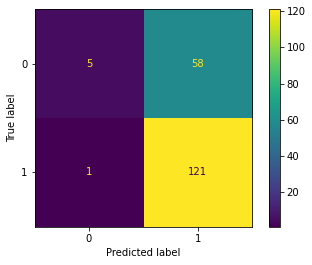

In [153]:
cm_dt2 = confusion_matrix(y_test, y_pred_dt2_te)

disp = ConfusionMatrixDisplay(cm_dt2,display_labels=classification.classes_)
disp.plot()
plt.show()

In [166]:
print("Train data R2 was: {:.2f}".format(classifier.score(X_train_transformed, y_train_res)))
print("Test data R2 was: {:.2f}".format(classifier.score(X_test, y_pred_dt2_te)))
#This is weird, I am not sure why it is showing 1 in both here.

Train data R2 was: 1.00
Test data R2 was: 1.00


In [175]:
results2 = cross_validate(classifier,X_train_transformed, y_train_res, cv = 5)
results2

{'fit_time': array([0.00800037, 0.00600338, 0.00600004, 0.00751138, 0.00899911]),
 'score_time': array([0.0019865 , 0.0010004 , 0.00100112, 0.0020051 , 0.00100255]),
 'test_score': array([0.77368421, 0.81052632, 0.82105263, 0.82105263, 0.88421053])}

In [186]:
cross_val_scores2 = cross_val_score(classifier, X_train_transformed, y_train_res, cv=10)
print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores2)))

The mean R2 of the folds was 0.85


In [212]:
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_dt2_te)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_dt2_te)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_dt2_te)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_dt2_te)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_dt2_te)))

The accuracy in the TEST set is: 0.68
The precision in the TEST set is: 0.68
The recall in the TEST set is: 0.99
The F1 in the TEST set is: 0.80
The Kappa in the TEST set is: 0.09


In [231]:
decision_tree_accuracy= accuracy_score(y_test,y_pred_dt2_te)
decision_tree_accuracy

0.6810810810810811

### Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_transformed, y_train_res)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_transformed, y_train_res)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))


The R2 for the Random Forest in the TRAIN set is 0.79
The R2 for the Random Forest in the TEST  set is 0.74


1    122
0     63
Name: is_acquired, dtype: int64

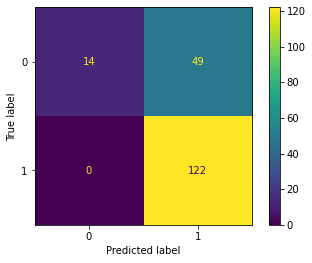

In [217]:
y_pred_rf = clf.predict(X_test)
display(y_test.value_counts())
cm_rf=confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.show()

In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_rf)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_rf)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_rf)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_rf)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_rf)))

The accuracy in the TEST set is: 0.74
The precision in the TEST set is: 0.71
The recall in the TEST set is: 1.00
The F1 in the TEST set is: 0.83
The Kappa in the TEST set is: 0.27


In [235]:
random_forest_accuracy=accuracy_score(y_test,y_pred_rf)
random_forest_accuracy

0.7351351351351352

In [219]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8)

# Train the model on training data
clf.fit(X_train_transformed, y_train_res)

cross_val_scores = cross_val_score(clf, X_train_transformed, y_train_res, cv=10)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean R2 of the folds was 0.76


In [220]:
cross_val_scores

array([0.74736842, 0.72631579, 0.74736842, 0.74736842, 0.74736842,
       0.73684211, 0.76842105, 0.77894737, 0.76842105, 0.78947368])

In [221]:
prediction = clf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

0.3081081081081081
0.5550748671198401


In [222]:
importances = list(zip(clf.feature_importances_.tolist(), X_train_transformed.columns.tolist()))
importances.sort(reverse=True)
display (importances)

[(0.2590067956296095, 'relationships'),
 (0.16361071903616017, 'age_last_milestone_year'),
 (0.09484677127040247, 'avg_participants'),
 (0.0912692403161919, 'milestones'),
 (0.0769496635211925, 'age_first_milestone_year'),
 (0.07276897398829611, 'funding_total_usd'),
 (0.06327431081883894, 'age_last_funding_year'),
 (0.04072022782665126, 'age_first_funding_year'),
 (0.03223062390575066, 'funding_rounds'),
 (0.029973104703475813, 'is_top500'),
 (0.012964151479253028, 'has_roundB'),
 (0.008959706304746143, 'is_otherstate'),
 (0.008696755055118322, 'has_roundA'),
 (0.00862939222959838, 'has_roundD'),
 (0.0069623977114908015, 'has_VC'),
 (0.006807689748034783, 'is_othercategory'),
 (0.0063783456293511525, 'is_CA'),
 (0.004933144710886815, 'has_roundC'),
 (0.004069487654637309, 'has_angel'),
 (0.001593423956988183, 'is_NY'),
 (0.0014133645344378077, 'is_mobile'),
 (0.0010166008316710076, 'is_enterprise'),
 (0.0009728783730103442, 'is_web'),
 (0.0009193444203735184, 'is_software'),
 (0.00052

Text(0.5, 1.0, 'feature importance score')

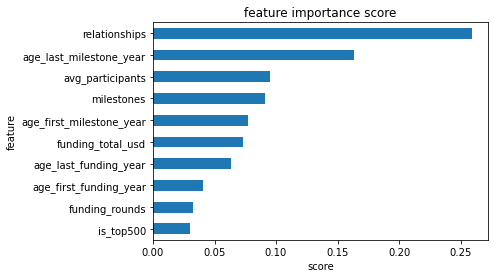

In [223]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
ax = importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### KNN Model

In [224]:
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train_transformed, y_train_res)

# Score
score_knn = knn_model.score(X_test, y_test)
score_knn

-0.015742909185532117

### Comparing all models:

In [236]:
pd.DataFrame({ 'Logistic Regression classification' : [Logistic_Regression_classification_accuracy],        
              'Decision_Tree': [decision_tree_accuracy],
              'Random_Forest': [random_forest_accuracy],
              'KNN Regression': [score_knn]})

,Logistic Regression classification,Decision_Tree,Random_Forest,KNN Regression
0,0.659459,0.681081,0.735135,-0.015743


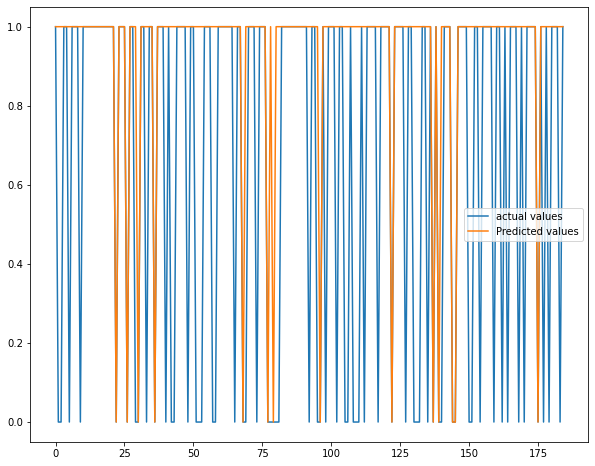

In [262]:
# Random Forest
plt.figure(figsize=(10, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],y_pred_rf, label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

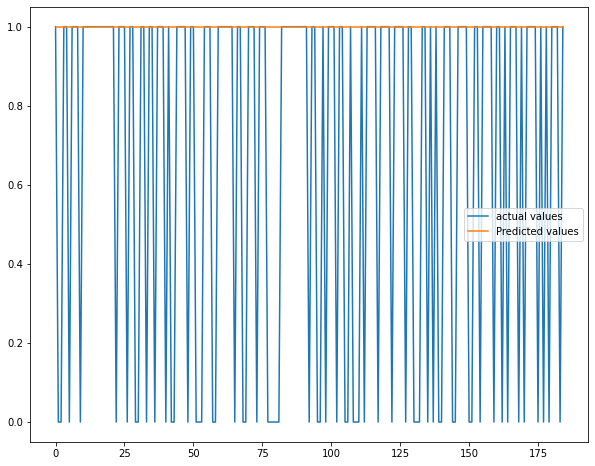

In [251]:
# Logistic Regression Classification
plt.figure(figsize=(10, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],y_test_pred, label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

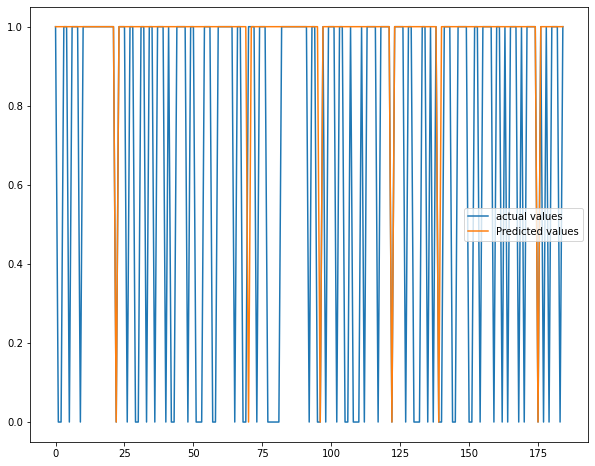

In [261]:
# Decision Tree
plt.figure(figsize=(10, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values")
plt.plot([i for i in range(len(y_test))],y_pred_dt2_te, label="Predicted values")
# showing the plotting
plt.legend()
plt.show()